**Importación librerias necesarías para realizar el EDA.**

In [123]:
# Tratamiento de datos
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure()


**1. EDA del primer dataset ('bank-additional.csv')**:

In [5]:
# Cargar el archivo csv 'bank-additional.csv':
bank = pd.read_csv('Data/bank-additional.csv',index_col = 0) # index_col = 0 para omitir el indice que pone pandas al cargar el datraframe

# Visualizar nombre de las columnas y las primeras 5 filas para comprobar que se ha cargado correctamente:
bank.head() # 5 primeras filas

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [6]:
# Dimensiones del set de datos:
print(f'Número de filas: {bank.shape[0]}\nNúmero de columnas: {bank.shape[1]}') 

Número de filas: 43000
Número de columnas: 23


In [7]:
# Visualizar el nombre de las columnas con el tipo de datos y si tienen nulos.
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

**Columnas con nulos**: age, job, marital, education, default, housing, loan, cons.price.idx, euribor3m, date


**Columnas con tipo de datos erroneo**:

cons.price.idx (texto) convertir a decimal
cons.conf.idx (texto) conveertir a decimal
euribor3m (texto) convertir a decimal
nr.employed (texto) convertira entero
date (texto) convertir a fecha
default (decimal) convertir a entero
housing (decimal) convertir a entero
loan (decimal) convertir a entero

**Descripción estadistica de las columnas numéricas**:

In [8]:
bank.describe().T # descripción estadistica de columnas numéricas por defecto, con .T muestra las transposición de las mismas

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
default,34019.0,0.000088,0.009390,0.000,0.00000,0.0000,0.00000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.00000,1.0000,1.00000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.00000,0.0000,0.00000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


La información de este dataframe muestra:

- default, housing y loan tienen unos y ceros
- pdays tiene una anomalia en los valores teniendo 999 en los días que han pasado desde el último contacto, posiblemente sea el valor arbitrario que le daban en el banco a los clientes con los que no se había contactado
- duration puede que tenga outliers
- campaign puede que tenga outliers
- latitude y longitude son coordenadas y no es necesario sacar información estadistica de ellas

**Descripción estadistica de las columnas categóricas**:

In [9]:
bank.describe(include ='O').T # para las columnas categóricas, la "O" equivale a object

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
cons.price.idx,42529,26,"93,994",7938
cons.conf.idx,43000,26,"-36,4",8020
euribor3m,33744,309,"4,857",2287
nr.employed,43000,11,"5228,1",16980
y,43000,2,no,38156


id_ no se repite, por lo que es el identificador único de cada cliente.

**Elementos únicos de las columnas categóricas y la cantidad de veces que se repiten**:

In [10]:
# Primero un Data Frame sólo con las columnas categóricas
bank_categoricas = bank.select_dtypes(include = 'O')

# Lista con los nombres de todas las columnas
lista_columnas = bank_categoricas.columns.tolist()# Al añadir .tolist() convierte el tipo index a lista para poder iterar por él.

# Para ver los valores únicos y el conteo de cada uno
for columna in lista_columnas:
    print(f'{columna.upper()}\n')
    print(f'Valóres únicos: {bank[columna].unique()}\n')# Imprime los valores únicos de la columna
    print(f'Columna {bank[columna].value_counts()}') # Contador de cada valor único
    print('----------------------------------------------------\n')

JOB

Valóres únicos: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

Columna job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64
----------------------------------------------------

MARITAL

Valóres únicos: ['MARRIED' 'SINGLE' 'DIVORCED' nan]

Columna marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64
----------------------------------------------------

EDUCATION

Valóres únicos: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

Columna education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4

**Análisis de los valores de las columnas categóricas**:

job: Valor más repetido 'admin', 11 únicos y tiene nulos.

marital: Valores únicos 3 (MARRIED, SINGLE, DIVORCED), más repetido 'MARRIED' y tiene nuloseducation:7 únicos. Valor más repetido 'university degree', menos repetido 'illiterate' con 18 registros. Tiene nulos

contact: 2 valores (telephone y cellular). El segundo tiene casi el doble de registros que el primero. No tiene nulos

poutcome: 3 valores (NONEXISTENT, FAILURE, SUCCESS). Tenemos notablemente más datos del primero que del resto. No tiene nulos

cons.price.idx: Es una falsa columna categórica. Tiene nulos

cons.conf.idx: Es una falsa columna categórica. No tiene nulos

euribor3m: Es una falsa columna categórica.Tiene nulos

nr.employed: Es una falsa columna categórica. No tiene nulos

y: 2 valores (no, yes). No: 38156, Yes: 4844. No tiene nulos.

date: Falsa columna categórica.es una fecha

id_: Identificador único. Sin nulos.

**Cantidad de nulos por columna**:

In [11]:
print('Nulos por columna:')
bank.isnull().sum()

Nulos por columna:


age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

**Cantidad de valores duplicados:**

In [12]:
print('Cantidad de duplicados por columna:')
bank.duplicated().sum() 

Cantidad de duplicados por columna:


np.int64(0)

**2. EDA del segundo Dataset 'customer-details.xlsx'**:

Data Frame para cada hoja del archivo de excel:

In [13]:
#DF distintos, uno para cada hoja.
customer_2012 = pd.read_excel('Data/customer-details.xlsx', sheet_name='2012', index_col = 0)
customer_2013 = pd.read_excel('Data/customer-details.xlsx', sheet_name='2013', index_col = 0)
customer_2014 = pd.read_excel('Data/customer-details.xlsx', sheet_name='2014', index_col = 0)

# Lista con los 3 DataFrames para poder hacer el EDA de los 3 al mismo tiempo
lista_customer = [customer_2012,customer_2013,customer_2014]

# Ver primeras filas de cada DF
for df in lista_customer:
    display(df.head())

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,82407,0,1,2013-10-07,29,ef81336c-e41a-46d0-8a30-5d4ac3b836be
1,24877,0,0,2013-04-21,32,50b224ac-84b4-42a7-aba9-3e1d1d620479
2,78839,1,0,2013-11-25,21,9cb15c53-b647-464a-add9-09cdae04897c
3,113859,1,1,2013-01-06,12,f8aaf334-949d-4943-a214-b64fe9c088b4
4,147317,0,0,2013-07-10,14,885fe85a-3718-4760-a32a-a57628cf7528


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,168812,1,1,2014-06-10,27,4d6c811c-0f24-4a73-b374-2ebd1f80d46e
1,108615,2,1,2014-04-05,24,eef0f24f-cbdb-4c67-b371-09d7bc59695e
2,179041,0,2,2014-09-22,4,bbfdcedd-199d-4927-94bb-5dad051ff471
3,116639,2,2,2014-08-16,3,e8ebb67d-4ee1-4615-b701-eefe3af607eb
4,49537,0,1,2014-09-05,28,f7f79ace-0024-4505-a401-f340946f0942


Tienen las mismas columnas con los mismos nombres.

**Dimensiones de cada uno de los data frames.**

In [14]:
# Iterar en un enumerate con la lista_customer y empieza en 2012
for year, df in enumerate(lista_customer, start = 2012):
    print(f'Número de filas  customer_{year}: {df.shape[0]} - Número de columnas: {df.shape[1]}') #tupla con filas y columnas.

print('----------------------\n')
print('Información de los 3 DataFrames:\n')
for df in lista_customer:
    print(df.info())

Número de filas  customer_2012: 20115 - Número de columnas: 6
Número de filas  customer_2013: 8965 - Número de columnas: 6
Número de filas  customer_2014: 14090 - Número de columnas: 6
----------------------

Información de los 3 DataFrames:

<class 'pandas.core.frame.DataFrame'>
Index: 20115 entries, 0 to 20114
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             20115 non-null  int64         
 1   Kidhome            20115 non-null  int64         
 2   Teenhome           20115 non-null  int64         
 3   Dt_Customer        20115 non-null  datetime64[ns]
 4   NumWebVisitsMonth  20115 non-null  int64         
 5   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 0 to 8964
Data columns (total 6 columns):
 #   Column             Non-Null Count 

Una vez comprobado  la cantidad de columnas y que son del mismo tipo, se procede a  hacer la unión de los data frames en uno solo.

**Unir verticalmente los data frames con las hojas de Excel:**

In [15]:
# Concatenar los data frames indexado por el indice único
customer_concat = pd.concat([customer_2012, customer_2013, customer_2014], axis = 0, ignore_index = True)
customer_concat.head() # muestra de las primeras filas



,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [16]:
print(f'Número de filas en customer_concat: {customer_concat.shape[0]} - Número de columnas: {customer_concat.shape[1]}')   #Comprobar las columnas y si el número de filas coincide con las suma de las filas de los data frames concatenados.

Número de filas en customer_concat: 43170 - Número de columnas: 6


In [17]:
customer_concat.info() # información de las columnas del nuevo dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [18]:
print('Cantidad de nulos:')
customer_concat.isnull().sum() # suma de los nulos

Cantidad de nulos:


Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [19]:
print('Cantidad de duplicados:', customer_concat.duplicated().sum()) # suma de los duplicados

Cantidad de duplicados: 0


**Comparación de las dimensiones de los dos dataframes, customer_concat y bank.**

In [20]:
print(f'Número de filas en bank: {bank.shape[0]}, y el número de columnas: {bank.shape[1]}')
print(f'Número de filas en customer_concat: {customer_concat.shape[0]}, y el número de columnas: {customer_concat.shape[1]}')

Número de filas en bank: 43000, y el número de columnas: 23
Número de filas en customer_concat: 43170, y el número de columnas: 6


In [21]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b


In [22]:
customer_concat.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


- El identificador id es el campo en común por el que se puede hacer la unión de los dos dataframes.
- Hay mayor cantidad de clientes de los que han participado en la campaña.
- Unir los Dataframes horizontalmente para solo obtener los valores coincidentes:

In [23]:
bank = bank.merge(customer_concat,how = 'inner', left_on = 'id_', right_on = 'ID') # une los dos data frames por los valores coincidentes
bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [24]:
bank.drop('id_', axis = 1, inplace = True) # eliminar la columna id_ axis = 1 eliminar los datos de una columna, axis = 0 de una fila. inplace=True sobreescribir el DF

In [ ]:
bank.columns #Comprobar que la coluna se ha borrado correctamente:

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'ID'],
      dtype='object')

In [43]:
nuevas_columnas = {columna:columna.lower().replace('.', '_') for columna in bank.columns} # itera por los nombres de las columnas pasandolos a minusculas y sustiyuendo los . por _. Crea un diccionario cuya clave es el nombre antiguo y el valor es el nombre cambiado

In [27]:
nuevas_columnas = {columna:columna.lower().replace('.', '_') for columna in bank.columns} # itera por los nombres de las columnas pasandolos a minusculas y sustiyuendo los . por _. Crea un diccionario cuya clave es el nombre antiguo y el valor es el nombre cambiado
bank.rename(columns = nuevas_columnas, inplace = True) # método rename para renombrar con los nombres del diccionario
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id'],
      dtype='object')

In [28]:
for columna in bank.columns.to_list(): # recorrer los valores de las columnas
    try:
        bank[columna] = bank[columna].str.lower() # pasar a minusculas
    except:
        pass

In [29]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,y,date,latitude,longitude,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id
0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,...,no,2-agosto-2019,41.495,-71.233,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,149,1,...,no,14-septiembre-2016,34.601,-83.923,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,1,...,no,15-febrero-2019,34.939,-94.847,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b


In [30]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp_var_rate       43000 non-null  float64       
 14  cons_p

In [31]:
fecha = bank['date'].str.split('-', expand = True) # genera un data frame con las columnas día, mes y año
fecha

,0,1,2
0,2,agosto,2019
1,14,septiembre,2016
2,15,febrero,2019
3,29,noviembre,2015
4,29,enero,2017
...,...,...,...
42995,13,octubre,2015
42996,17,marzo,2018
42997,15,septiembre,2016
42998,23,septiembre,2019


In [32]:
# nueva columna mes
bank['contact_month'] = fecha[1]
# nueva columna año
bank['contact_year'] = fecha[2]

In [33]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,latitude,longitude,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,contact_month,contact_year
0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,...,41.495,-71.233,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,agosto,2019
1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,149,1,...,34.601,-83.923,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,septiembre,2016


In [34]:
    #Diccionario con la clave nombre del mes y el valor el número del mes
meses = {'enero':'01',
        'febrero':'02',
        'marzo':'03',
        'abril':'04',
        'mayo':'05',
        'junio':'06',
        'julio':'07',
        'agosto':'08',
        'septiembre':'09',
        'octubre':'10',
        'noviembre':'11',
        'diciembre':'12'
    }
bank.replace({'date':meses}, regex = True,inplace = True) # reemplaza los nombres de los meses por el número

bank['date'] = pd.to_datetime(bank['date'], format = "%d-%m-%Y") # datetime para cambiar a tipo fecha

In [35]:
bank['date'].head()

0   2019-08-02
1   2016-09-14
2   2019-02-15
3   2015-11-29
4   2017-01-29
Name: date, dtype: datetime64[ns]

In [36]:
bank['education'] = bank['education'].str.replace('.',' ') # reemplaza los puntos por espacios

In [37]:
bank['education'].head()

0       basic 4y
1    high school
2    high school
3       basic 6y
4    high school
Name: education, dtype: object

In [38]:
# Convertir a decimal las columnas: 'cons_price_idx','cons_conf_idx','euribor3m','nr_employed':
# lista con los nombres de las columnas a convertir
str_float = ['cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
# Itera por la lista
for col in str_float:
    #Sustituye las ',' por '.'
    bank[col] = bank[col].str.replace(',','.')
    #función lambda para cambiar el tipo de dato
    bank[col] = bank[col].apply(lambda x: float(x))

In [39]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp_var_rate       43000 non-null  float64       
 14  cons_p

In [40]:
# Cambiar los valores 0 y 1 por No y Si en las columnas: 'default','housing','loan':
# crear diccionario
diccionario_mapeo = {0: "No", 1: "Si"}
# lista con las columnas
mapear = ['default','housing','loan']
# Itera por la lista y cambia los valores
for col in mapear:
    bank[col] = bank[col].map(diccionario_mapeo)

In [41]:
bank['pdays'].head()

0    999
1    999
2    999
3    999
4    999
Name: pdays, dtype: int64

In [42]:
# Cambiar 999 por nan en la columna 'pdays':
# En la columna 'pdays' hay valores 999, lo que indica que ese valor se añadía cuando no se había contactado con el cliente por lo que lo aconsejable es cambiar ese valor por 'null' para que no altere el resultado si hay que hacer algún calculo con esta columna.

# método '.replace()' sobre la columna 'pdays' para reemplazar los valores 999 por nulos de numpy (np.nan)
bank['pdays'] = bank['pdays'].replace(999, np.nan)

In [43]:
bank['pdays'].head(3)

0   NaN
1   NaN
2   NaN
Name: pdays, dtype: float64

In [44]:
bank.to_csv('Data/bank-limpio.csv') # guardar data frame limpio en archivo csv

In [45]:
bank = pd.read_csv('data/bank-limpio.csv',index_col = 0) # Cargar el archivo con los datos limpios para continuar con la transformación.

In [46]:
# Sustituir los valores nulos en las columnas que los tengan, según cada necesidad individual.
# porcentaje de nulos en las columnas.
nulos = (bank.isnull().sum() / bank.shape[0]) * 100

# convierte el cálculo anterior a DataFrame
df_nulos = pd.DataFrame(nulos, columns = ['%_nulos'])

# Filtra las columnas que tengan nulos
df_nulos[df_nulos['%_nulos'] > 0]

,%_nulos
age,11.906977
job,0.802326
marital,0.197674
education,4.202326
default,20.886047
housing,2.386047
loan,2.386047
pdays,96.306977
cons_price_idx,1.095349
euribor3m,21.525581


In [47]:
# Gestión de nulos en las columnas categóricas:
#lista de columnas categóricas que tienen nulos
col_nulos_categoricas = bank[bank.columns[bank.isnull().any()]].select_dtypes(include = 'O').columns
print('Columnas categóricas con nulos: \n ')
print(col_nulos_categoricas)

Columnas categóricas con nulos: 
 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'date',
       'contact_month'],
      dtype='object')


In [48]:
# distribución de los valores por categoría
for col in col_nulos_categoricas:
    print(f'La distribución de las categorías para la columna {col.upper()}')
    print(f'{bank[col].value_counts() / bank.shape[0]*100} %') # % de aparición
    print('-----------------------------------------------------')

La distribución de las categorías para la columna JOB
job
admin.           25.286047
blue-collar      22.451163
technician       16.339535
services          9.679070
management        7.093023
retired           4.162791
entrepreneur      3.539535
self-employed     3.462791
housemaid         2.611628
unemployed        2.472093
student           2.100000
Name: count, dtype: float64 %
-----------------------------------------------------
La distribución de las categorías para la columna MARITAL
marital
married     60.462791
single      28.151163
divorced    11.188372
Name: count, dtype: float64 %
-----------------------------------------------------
La distribución de las categorías para la columna EDUCATION
education
university degree      29.586047
high school            23.081395
basic 9y               14.672093
professional course    12.737209
basic 4y               10.130233
basic 6y                5.548837
illiterate              0.041860
Name: count, dtype: float64 %
--------------

**Conclusiones de los valores únicos**
- job: El resultado principal es 'admin' 25%, seguido de 'blue-collar' 22% , no hay una diferencia significativa.

- marital: 3 valores (married,single y divorced), married destaca muy por encima del resto con un 60%.

- education: 7 valores. No hay ningún valor que destaque frente al resto.

- default: Sólo tenemos dos valores (No y Si). El 'No' tiene un 79% de aparición.

- housing: Valores 'Si' y 'No'. No hay ningún valor que destaque frente al otro.

- loan: Sólo tenemos dos valores (No y Si). El 'No' tiene un 82% de aparición

- date: Son fechas, los valores no destacan entre si.

- contact_month: Son meses y los valores se reparten de manera equitativa entre todos los meses.

In [49]:
print(col_nulos_categoricas)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'date',
       'contact_month'],
      dtype='object')


**Columnas a reemplazar por la moda: (porque tienen valores muy destacados)**
- marital
- loan
- default

In [50]:
columnas_moda = ['marital', 'loan', 'default']
# Iterar por la lista con las columnas a sustituir por la moda
for columna in columnas_moda:
    
    # Calcula la moda
    moda = bank[columna].mode()[0] # Selecciona la posición 0 ya que es el primer valor que aparezca
    
    # Método fillna reemplaza los valores nulos por la moda calculada
    bank[columna] = bank[columna].fillna(moda)

# Comprobar si se han eliminado los nulos en las columnas de "marital", "loan" y "default"
print('Cantidad de nulos después de fillna:')

bank[columnas_moda].isnull().sum()

Cantidad de nulos después de fillna:


marital    0
loan       0
default    0
dtype: int64

**Columnas a reemplazar por 'uknown': porque no tienen valores que destaquen demasiado, con porcentajes homogéneos.**
- job
- education
- housing
- contact_month
- date

In [51]:
columnas_desconocido = ['job', 'education', 'housing', 'contact_month', 'date']
#Iitera por la lista de columnas para cambiar los nulos por 'uknown'
for columna in columnas_desconocido:
    
    # Reemplaza los nulos por el valor unknown
    bank[columna] = bank[columna].fillna('unknown')
    
# Comprobar nulos 
print('Cantidad de nulos depués de fillna:')
bank[columnas_desconocido].isnull().sum()

Cantidad de nulos depués de fillna:


job              0
education        0
housing          0
contact_month    0
date             0
dtype: int64

In [53]:
# Gestión de nulos en las columnas numéricas:
# lista de columnas numéricas que tienen nulos
nulos_esta_num = bank[bank.columns[bank.isnull().any()]].select_dtypes(include = np.number).columns
print('Columnas numéricas con nulos:\n')
print(nulos_esta_num)

Columnas numéricas con nulos:

Index(['age', 'pdays', 'cons_price_idx', 'euribor3m', 'contact_year'], dtype='object')


In [54]:
# porcentaje de nulos en cada una de las columnas numericas
bank[nulos_esta_num].isnull().sum() / bank.shape[0]*100

age               11.906977
pdays             96.306977
cons_price_idx     1.095349
euribor3m         21.525581
contact_year       0.576744
dtype: float64

- La columna 'contact_year' aunque es numérica no se va a operar con ella por lo que no es necesario tratarla como numérica.
- Sustituir nulos por 'unknown' junto con la columna 'pdays' porque esta tiene gran cantidad de nulos.

In [55]:
columnas_num_desconocido = ['contact_year', 'pdays']

# itera por la lista de columnas 
for columna in columnas_num_desconocido:
    
    # Reemplaza los nulos por el valor unknown
    bank[columna] = bank[columna].fillna('unknown')
    
# Comprobar nulos 
print('Cantidad de nulos depués de fillna:')
bank[columnas_num_desconocido].isnull().sum()

Cantidad de nulos depués de fillna:


contact_year    0
pdays           0
dtype: int64

- Comprobación de outliers en las columnas que quedan con nulos para ver como interesa más sustituir los nulos. Utilizando un grafico de caja de bigotes.

In [124]:
fig = make_subplots(
    rows = 2, cols = 2,
    specs = [[{'colspan': 2},None], [{'type': 'xy'},{'type': 'xy'}]], subplot_titles = ['age', 'cons_price_idx','euribor3m'])
fig.add_trace(go.Box(x = bank['age']
             ),
             row = 1,col = 1)
fig.add_trace(go.Box(x = bank['cons_price_idx']
             ),
             row = 2,col = 1),
fig.add_trace(go.Box(x = bank['euribor3m']
             ),
             row = 2,col = 2)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'box',
              'x': {'bdata': ('mpmZmZkZQ0AAAAAAAIBMQAAAAAAAgE' ... 'kAEv1DQM3MzMzMTEFAMzMzMzMzRUA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'},
             {'type': 'box',
              'x': {'bdata': ('Vg4tsp1/V0BWDi2ynX9XQFYOLbKdf1' ... 'KDwHpXQJhuEoPAeldAzczMzMxMV0A='),
                    'dtype': 'f8'},
              'xaxis': 'x2',
              'yaxis': 'y2'},
             {'type': 'box',
              'x': {'bdata': ('IbByaJFtE0CEL0ymCsYTQCGwcmiRbR' ... 'Vtou4MQKJFtvP91BNAL90kBoEVEEA='),
                    'dtype': 'f8'},
              'xaxis': 'x3',
              'yaxis': 'y3'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'age',
                                'x': 0.5,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'cons_price_idx',
                                'x': 0.225,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 0.375,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'euribor3m',
                                'x': 0.775,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 0.375,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 0.45]},
               'xaxis3': {'anchor': 'y3', 'domain': [0.55, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.625, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.375]},
               'yaxis3': {'anchor': 'x3', 'domain': [0.0, 0.375]}}
})

- Se puede observar que sólamente 'age' tiene outliers.

- La columna 'cons_price_idx' tiene un porcentaje muy pequeño de nulos y no tiene outliers, por lo tanto se procede a sustituir los nulos por la media o por la mediana dependiendo de cual de las dos tenga una desvicación más baja.

In [70]:
bank['cons_price_idx'].describe()[['mean', '50%','std']] # visualiza la media, la mediana y la desviación típica.

mean    93.574219
50%     93.749000
std      0.579548
Name: cons_price_idx, dtype: float64

In [71]:
# crea una variable con el valor de la media y otro con el de la mediana
media_conspriceidx = bank['cons_price_idx'].mean()
mediana_conspriceidx = bank['cons_price_idx'].median()
# Crea un DF sólo con la columna.
bank_consprice = bank['cons_price_idx'].reset_index()
# Aplica el método 'fillna()' a la columna. Uno con la media y otro con la mediana
bank_consprice['cons_price_idx_media'] = bank_consprice['cons_price_idx'].fillna(media_conspriceidx)
bank_consprice['cons_price_idx_mediana'] = bank_consprice['cons_price_idx'].fillna(mediana_conspriceidx)
bank_consprice

,index,cons_price_idx,cons_price_idx_media,cons_price_idx_mediana
0,0,93.994,93.994,93.994
1,1,93.994,93.994,93.994
2,2,93.994,93.994,93.994
3,3,93.994,93.994,93.994
4,4,93.994,93.994,93.994
...,...,...,...,...
42995,42995,93.444,93.444,93.444
42996,42996,93.200,93.200,93.200
42997,42997,93.918,93.918,93.918
42998,42998,93.918,93.918,93.918


In [72]:
print(f"Desviación de la media de la columna cons_price_idx:\n{bank_consprice['cons_price_idx_media'].describe()['std']}") # desviación de la media
print(f"Desviación de la mediana de la columna cons_price_idx:\n{bank_consprice['cons_price_idx_mediana'].describe()['std']}") # desviación de la mediana

Desviación de la media de la columna cons_price_idx:
0.5763653968490053
Desviación de la mediana de la columna cons_price_idx:
0.5766524288921129


In [73]:
bank['cons_price_idx'] = bank['cons_price_idx'].fillna(media_conspriceidx) # sustituye los nulos por la media
print(f"Nulos despues del  'fillna': {bank['cons_price_idx'].isnull().sum()}")

Nulos despues del  'fillna': 0


In [75]:
# Para la columna 'age' que tiene outliers y la columna 'euribor3m' que tiene un porcentaje alto de nulos se va a utilizar el método predictivo Imputer KNNImputer para rellenar los valores nulos.
bank_imputer = bank[['age','euribor3m']] # hace una copia del dataframe original
bank_imputer.head()

,age,euribor3m
0,NaN,4.857
1,57.0,NaN
2,37.0,4.857
3,40.0,NaN
4,56.0,NaN


In [88]:
# Instancia la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# Ajusta y transforma los datos
imputer_knn_imputado = imputer_knn.fit_transform(bank_imputer[['age', 'euribor3m']])

imputer_knn_imputado

array([[38.2       ,  4.857     ],
       [57.        ,  4.9434    ],
       [37.        ,  4.857     ],
       ...,
       [39.97711193,  3.61652074],
       [34.6       ,  4.958     ],
       [42.4       ,  4.021     ]], shape=(43000, 2))

In [89]:
bank_imputer[['age_knn', 'euribor_knn']] = imputer_knn_imputado # crear columnas con los valores cambiados

C:\Users\139463\AppData\Local\Temp\ipykernel_932\2095906929.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\139463\AppData\Local\Temp\ipykernel_932\2095906929.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
bank['age'] = bank_imputer['age_knn']
bank['euribor3m'] = bank_imputer['euribor_knn']

In [ ]:
bank.isnull().sum() # comprobar si quedan nulos

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
date                 0
latitude             0
longitude            0
income               0
kidhome              0
teenhome             0
dt_customer          0
numwebvisitsmonth    0
id                   0
contact_month        0
contact_year         0
dtype: int64

In [92]:
# Guardar el DataFrame
bank.to_csv('data/bank-limpio-sin-nulos.csv')

**PARTE FINAL DEL EDA CON EL ARCHIVO DEFINITIVO:**
# Cargar el nuevo archivo ya limpio para continuar con el EDA.

In [93]:
bank = pd.read_csv('data/bank-limpio-sin-nulos.csv', index_col = 0) # cargar el archivo csv sin nulos

In [94]:
bank.isnull().sum() # comprobar nulos

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
date                 0
latitude             0
longitude            0
income               0
kidhome              0
teenhome             0
dt_customer          0
numwebvisitsmonth    0
id                   0
contact_month        0
contact_year         0
dtype: int64

In [95]:
print(f'Cantidad de duplicados en el Dataset: {bank.duplicated().sum()}') # comprobar que no hay duplicados

Cantidad de duplicados en el Dataset: 0


In [96]:
bank.describe().T #resumen estadistico de col num

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.885099,9.918379,17.000,32.00000,39.000000,46.00000,98.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.000000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.000000,3.00000,56.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.000000,0.00000,7.000
emp_var_rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.100000,1.40000,1.400
cons_price_idx,43000.0,93.574219,0.576365,92.201,93.07500,93.574219,93.99400,94.767
cons_conf_idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.800000,-36.40000,-26.900
euribor3m,43000.0,3.593669,1.591739,0.634,1.43500,4.208800,4.95900,5.045
nr_employed,43000.0,5166.852602,72.411125,4963.600,5099.10000,5191.000000,5228.10000,5228.100
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.761000,43.11325,49.384


In [98]:
# Resumen de los valores repetidos en cada columna categórica:
print(bank['job'].value_counts())
print('------------------------------')
print(bank['marital'].value_counts())
print('------------------------------')
print(bank['education'].value_counts())

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            345
Name: count, dtype: int64
------------------------------
marital
married     26084
single      12105
divorced     4811
Name: count, dtype: int64
------------------------------
education
university degree      12722
high school             9925
basic 9y                6309
professional course     5477
basic 4y                4356
basic 6y                2386
unknown                 1807
illiterate                18
Name: count, dtype: int64


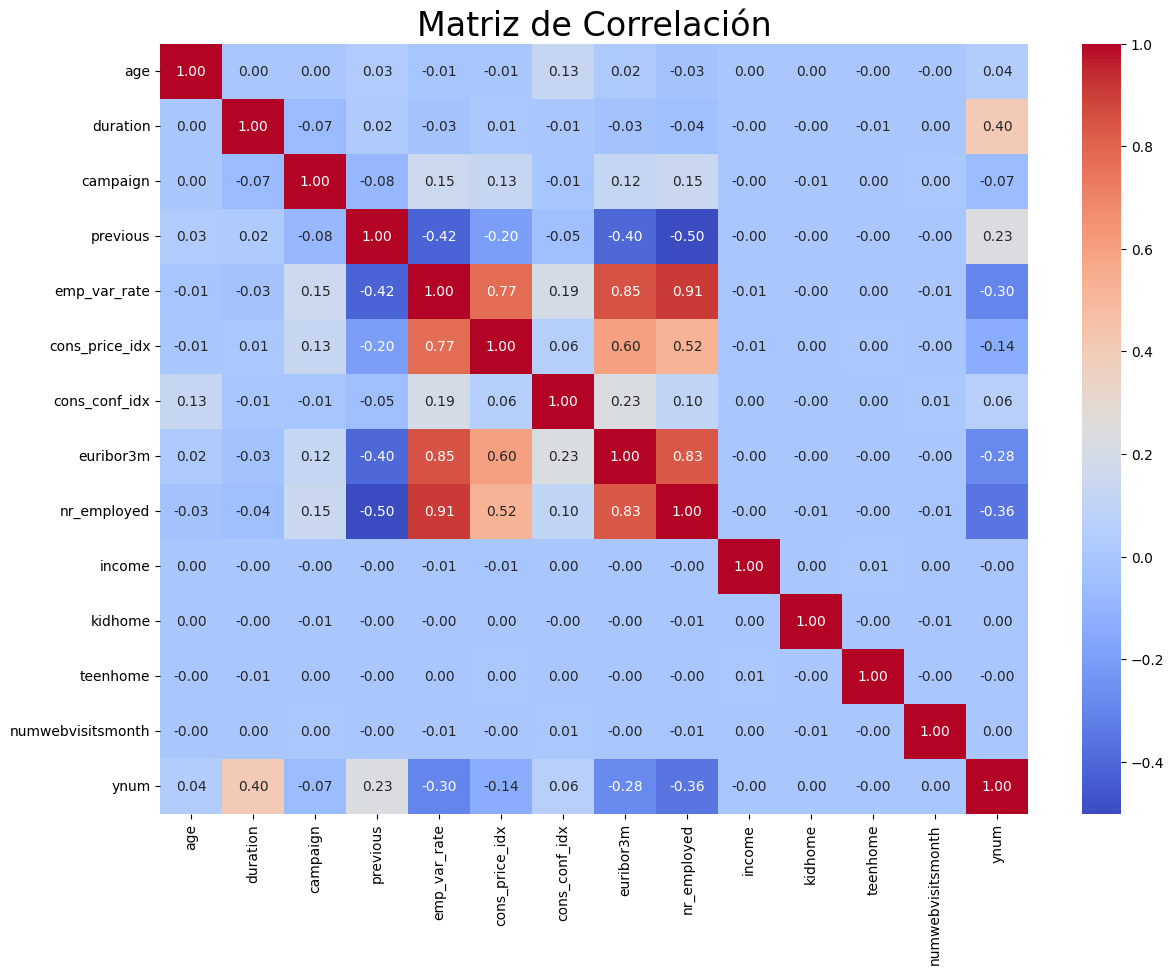

In [ ]:
# Matriz de correlación de las columnas numéricas con la columna 'y':
# Seleccionar solo las columnas numéricas
numeric_columns = bank.select_dtypes(include='number')
numeric_columns.drop(['latitude',  'longitude'], axis=1, inplace=True)


#Convertir la columna 'y' a ceros y unos y añadirla a las variables numéricas
numeric_columns['ynum'] = bank['y'].map({'no' : 0, 'yes' : 1})

# Calcular la matriz de correlación solo para columnas numéricas
correlation_matrixx = numeric_columns.corr()# Calcular la matriz de correlación

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrixx, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación', fontsize = 24)

plt.show()

C:\Users\139463\AppData\Local\Temp\ipykernel_932\2353789532.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



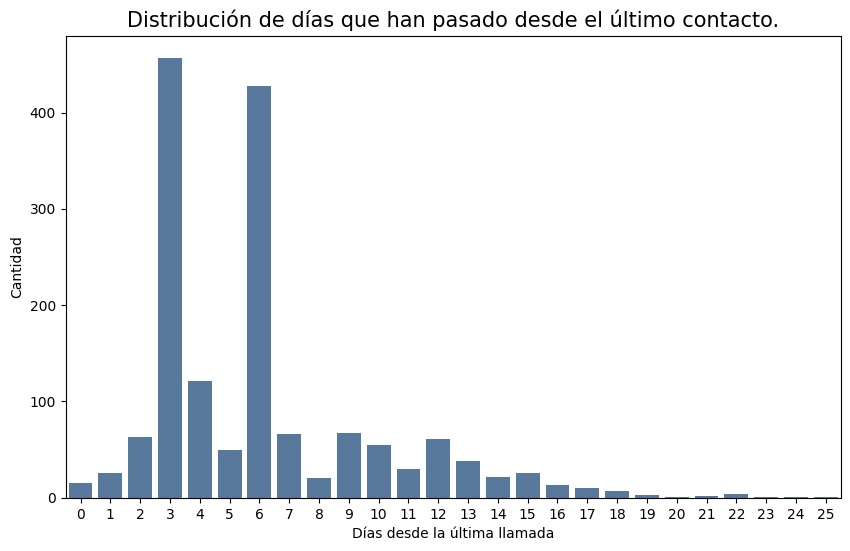

In [115]:
# Gráfico con la distrubución de los días que han pasado desde el último contacto después de quitar los valores desconocidos:

# Filtrar datos para obtener solo aquellos que fueron contactados previamente
bank_contact = bank[bank['pdays'] != 'unknown']

# Convertir pdays a decimal
bank_contact['pdays'] = bank_contact['pdays'].astype(float)

# Ordenar los valores de pdays de menor a mayor
bank_contact = bank_contact.sort_values('pdays')

# Graficar
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_contact, x='pdays', color= '#4C78A8', order=sorted(bank_contact['pdays'].unique()))
plt.xlabel('Días desde la última llamada')
plt.ylabel('Cantidad')
plt.title('Distribución de días que han pasado desde el último contacto.', fontsize = 15)
plt.xticks(rotation=90)

# Formatear las etiquetas del eje x para que no muestren decimales
current_ticks = plt.xticks()[0]
plt.xticks(current_ticks, [int(tick) for tick in current_ticks], rotation = 0)

plt.show()

# En la mayoría de los casos han pasado 3 ó 6 días desde el último contacto.

C:\Users\139463\AppData\Local\Temp\ipykernel_932\256846819.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




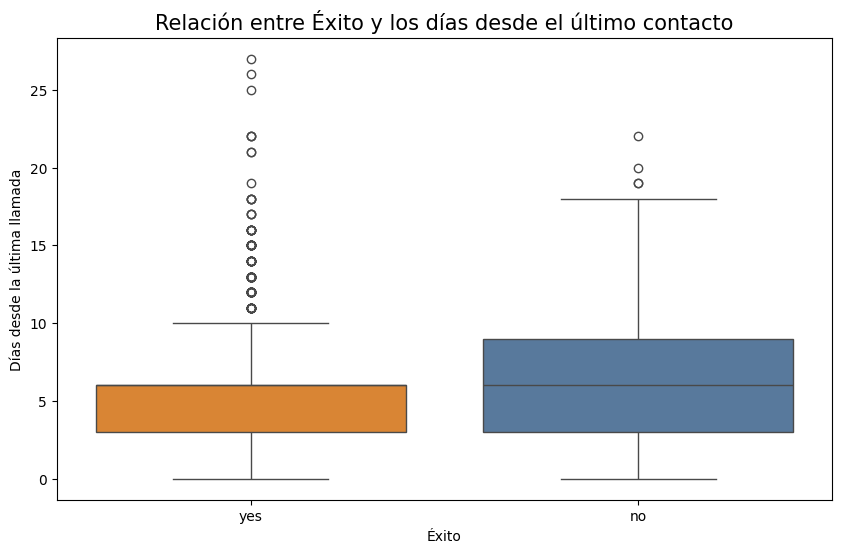

In [117]:
# Gráfico que relaciona el éxito y el número de días que han pasado desde el último contacto con el cliente:
# Relación entre pdays y éxito
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='pdays', data=bank_contact, palette={'yes': '#F58518', 'no': '#4C78A8'})
plt.xlabel('Éxito')
plt.ylabel('Días desde la última llamada')
plt.title('Relación entre Éxito y los días desde el último contacto', fontsize = 15)
plt.show()

# La relación entre el número de días que han pasado desde el último contacto y el éxito no es significativa pero si se puede apreciar que si no han pasado más de 6 días desde el último contacto hay una mayor posibilidad de contratación.

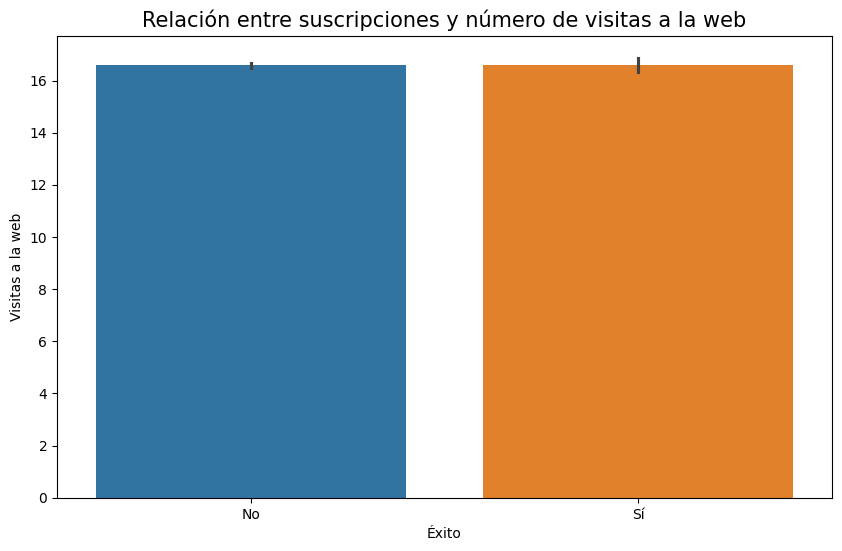

In [118]:
# Gráfico para mostrar la relación del número de visitas a la web y el éxito de contratación:
# Relación entre el éxito y las visitas a la web
plt.figure(figsize=(10, 6))
sns.barplot(data = bank, x = 'y', y = 'numwebvisitsmonth', hue = 'y', legend = False)
plt.xlabel('Éxito')
plt.ylabel('Visitas a la web')
plt.xticks(['no', 'yes'], ['No', 'Sí'])
plt.title('Relación entre suscripciones y número de visitas a la web',fontsize = 15)
plt.show()

# No se puede apreciar que haya una relación directa entre el número de visitas a la web y el éxito de contratación.

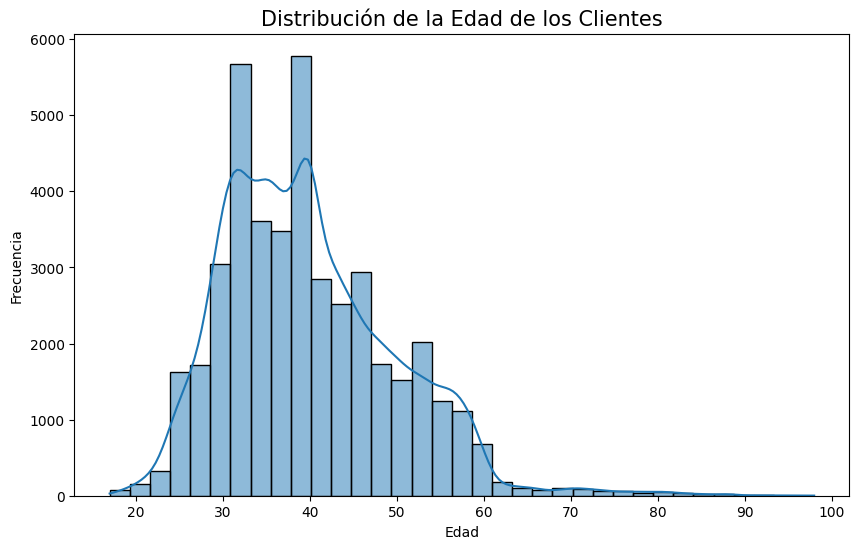

In [119]:
# Distribución de la edad de los clientes:
plt.figure(figsize=(10, 6))
sns.histplot(bank['age'], bins=35, kde=True)
plt.title('Distribución de la Edad de los Clientes', fontsize = 15)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# La distribución de la edad de los clientes del banco revela una mayor concentración en el rango de 30 a 55 años, con una edad promedio alrededor de los 40 años.

**Informe Final: Análisis de la Campaña de Marketing Telefónico de la Entidad Bancaria Portuguesa**

*Introducción*
El análisis exploratorio de datos (EDA) incluyó la limpieza y transformación de los datos, la creación de visualizaciones para identificar patrones, y el análisis de tendencias clave. La base de datos utilizada fue filtrada para eliminar valores nulos, asegurando que los resultados fueran representativos y precisos. Este informe presenta un análisis exhaustivo de una campaña de marketing telefónico llevada a cabo por una entidad bancaria en Portugal. El objetivo de la campaña era vender productos financieros a través de llamadas telefónicas. A lo largo del análisis, se examinaron diversos aspectos de la campaña, incluyendo la efectividad en diferentes periodos, la relación entre el número y la duración de las llamadas con el éxito de la campaña, y el impacto de variables demográficas como la edad, estado civil, ocupación, y tipo de contacto en las tasas de éxito.

*Resultados del Análisis*
1. Llamadas Realizadas por Mes y Año
Se observó que no hay una variación significativa en el número de llamadas realizadas entre los meses de las diferentes campañas. La diferencia de llamadas entre meses no excedió las 100, indicando una consistencia en la ejecución de las campañas a lo largo del tiempo.

2. Tasa de Contratación de Productos
El porcentaje de contratación de los productos ofrecidos es bajo, con un 11.3% de los clientes que aceptaron la oferta frente a un 88.7% que no lo hizo. Este dato refleja la necesidad de evaluar y posiblemente mejorar la estrategia de venta para aumentar la tasa de éxito.

3. Relación entre Número de Contactos y Éxito de la Campaña
- Número de Contactos: Se encontró que contactar repetidamente a los clientes tiende a ser contraproducente. La relación entre el número de veces que se contactó al cliente y la suscripción al producto es negativa. Sin embargo, los contactos previos pueden aumentar las posibilidades de éxito, especialmente si se limita el número de intentos a entre 3 y 6 llamadas.

- Duración de las Llamadas: Las llamadas más largas tienden a tener una mayor tasa de éxito. Dedicar más tiempo a una llamada parece incrementar las probabilidades de que un cliente acepte la oferta.

4. Impacto de Variables Demográficas
- Edad: La mayor parte de los clientes del banco se concentran en el rango de 30 a 55 años, con una edad promedio alrededor de los 40 años. Los clientes dentro de este rango tienen una mayor probabilidad de suscribirse a los productos ofrecidos, ya que son la muestra más amplia. Sin embargo, el porcentaje más alto de éxito se encontró en clientes mayores de 60 años, aunque este grupo es menos numeroso.

- Tipo de Contacto: El contacto por teléfono móvil resultó ser más efectivo que el contacto por teléfono fijo. Se observó una mayor tasa de éxito en las llamadas realizadas a través de teléfonos móviles, especialmente en el grupo de edad de 30 a 50 años.

- Estado Civil: Los clientes casados representaron el mayor número de contactos y suscripciones exitosas, seguidos por los solteros. Aunque los solteros tuvieron una tasa de éxito relativamente alta, los casados fueron el grupo con más interacción en la campaña.

- Ocupación: No se identificó una relación significativa entre la ocupación y la tasa de éxito, aunque los clientes en administración y obreros fueron los grupos más numerosos. Estos grupos pueden ser buenos candidatos para campañas futuras enfocadas específicamente en ellos.

5. Comparación con Campañas Anteriores
Al comparar los resultados de esta campaña con una campaña anterior, se observó un aumento del 8% en el número de contrataciones, lo que indica una mejora significativa en la efectividad de la campaña y que algunos pese a que en la campaña anterior no habían contratado en la última sí lo habían hecho.

6. Relación con Variables Macroeconómicas
El análisis no encontró una relación significativa entre las variables macroeconómicas y la tasa de éxito de la campaña, lo que sugiere que otros factores, posiblemente más específicos al cliente, tienen un mayor impacto en la decisión de suscribirse a los productos ofrecidos.


**Conclusiones y Recomendaciones**
El análisis revela varios aspectos clave que pueden ayudar a optimizar futuras campañas de marketing:

Estrategia de Contacto: Reducir el número de llamadas y centrarse en la calidad de cada contacto podría mejorar significativamente las tasas de suscripción.

Segmentación por Edad: Dado que los clientes entre 30 y 50 años muestran una mayor disposición a suscribirse, las campañas deberían centrarse en este grupo de edad, particularmente a través de contactos por móvil.

Tipo de Contacto: Priorizar el uso de teléfonos móviles en lugar de fijos podría aumentar las tasas de éxito, especialmente entre los clientes más jóvenes.

Optimización de la Duración de las Llamadas: Dedicando más tiempo a cada llamada, se puede mejorar la probabilidad de contratación, especialmente en los primeros intentos de contacto.

Campañas Enfocadas en Ocupación: Considerar estrategias específicas para los sectores de administración y obreros podría maximizar los resultados, dado el alto número de clientes en estos grupos.